In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

tf.random.set_seed(111)

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=111)

print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('테스트 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))

print(x_train_full[0])

print(y_train_full[0])

학습 데이터: (404, 13)	레이블: (404,)
테스트 데이터: (102, 13)	레이블: (102,)
[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]
25.0


In [3]:
mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean)/ std
x_test = (x_test-mean) / std

x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full, test_size=0.3, random_state=111)

print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_train.shape, y_train.shape))
print('검증 데이터: {}\t레이블: {}'.format(x_val.shape, y_val.shape))
print('테스트 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
학습 데이터: (282, 13)	레이블: (282,)
검증 데이터: (122, 13)	레이블: (122,)
테스트 데이터: (102, 13)	레이블: (102,)


In [4]:
model = Sequential([Dense(100, activation='relu', input_shape=(13, ), name='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    Dense(1, name='output')])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 100)               1400      
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


In [5]:
plot_model(model)

model.compile(loss='mse', optimizer=Adam(learning_rate=1e-2), metrics=['mae'])

history = model.fit(x_train, y_train, epochs=300, validation_data=(x_val, y_val))

model.evaluate(x_test, y_test)

print(history.history.keys())

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

Epoch 1/300
9/9 [==============================] - 1s 23ms/step - loss: 285.1867 - mae: 14.0728 - val_loss: 132.4552 - val_mae: 9.1088
Epoch 2/300
9/9 [==============================] - 0s 8ms/step - loss: 60.9879 - mae: 5.9217 - val_loss: 31.4357 - val_mae: 4.4588
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 33.7112 - mae: 4.2293 - val_loss: 22.2756 - val_mae: 3.6017
Epoch 4/300
9/9 [==============================] - 0s 7ms/step - loss: 21.5946 - mae: 3.4391 - val_loss: 13.9826 - val_mae: 2.9190
Epoch 5/300
9/9 [==============================] - 0s 7ms/step - loss: 16.3538 - mae: 2.8935 - val_loss: 11.7222 - val_mae: 2.7147
Epoch 6/300
9/9 [==============================] - 0s 7ms/step - loss: 13.6432 - mae: 2.5889 - val_loss: 10.9746 - val_mae: 2.5883
Epoch 7/300
9/9 [==============================] - 0s 7ms/step - loss: 12.6474 - mae: 2.4426 - val_loss: 9.1844 - val_mae: 2.3985
Epoch 8/300
9/9 [==============================] - 0s 8ms/step - loss: 12.5111 -

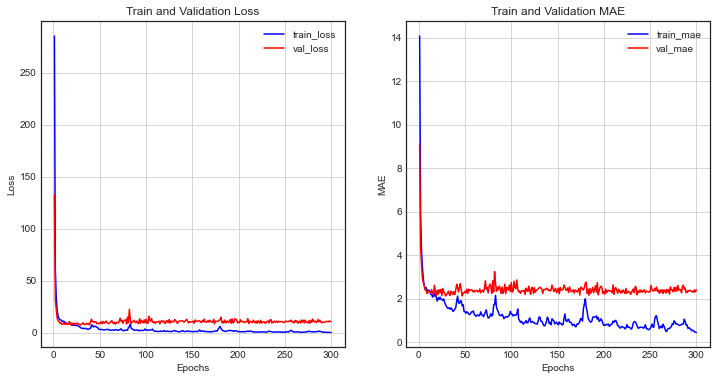

In [6]:
epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, mae, color='blue', label='train_mae')
ax2.plot(epochs, val_mae, color='red', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()


In [28]:
from sklearn.model_selection import KFold
from tensorflow.keras import Model


In [30]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=111)

mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean)/ std
x_test = (x_test-mean) / std


In [38]:
k = 3 

Kfold = KFold(n_splits=k, shuffle=True, random_state=66)

def build_model():
    input = Input(shape=(13, ),name='input')
    hidden1 = Dense(100, activation='relu', name='dense1')(input)
    hidden2 = Dense(64, activation='relu', name='dense2')(hidden1)
    hidden3 = Dense(32, activation='relu', name='dense3')(hidden2)
    output = Dense(1, name='output')(hidden3)
    
    model = Model(inputs=[input], outputs=output)
    
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    
    return model

In [42]:

mae_list = []

for train_idx, val_idx in Kfold.split(x_train):
    x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train_full[train_idx], y_train_full[val_idx]
    
    model = build_model()
    
    model.fit(x_train_fold, y_train_fold, epochs=300, validation_data=(x_val_fold, y_val_fold))
    
    model.evaluate(x_test, y_test)
    
    _, test_mae = model.evaluate(x_test, y_test)
    
    mae_list.append(test_mae)
    
print(mae_list)

print(np.mean(mae_list))



Epoch 1/300
6/6 [==============================] - 1s 56ms/step - loss: 615.6127 - mae: 22.9533 - val_loss: 612.7767 - val_mae: 22.7722
Epoch 2/300
6/6 [==============================] - 0s 11ms/step - loss: 597.0331 - mae: 22.5353 - val_loss: 595.5556 - val_mae: 22.3876
Epoch 3/300
6/6 [==============================] - 0s 12ms/step - loss: 577.8201 - mae: 22.1008 - val_loss: 574.5982 - val_mae: 21.9078
Epoch 4/300
6/6 [==============================] - 0s 12ms/step - loss: 553.9589 - mae: 21.5244 - val_loss: 546.4332 - val_mae: 21.2435
Epoch 5/300
6/6 [==============================] - 0s 11ms/step - loss: 520.5404 - mae: 20.7402 - val_loss: 507.6588 - val_mae: 20.2857
Epoch 6/300
6/6 [==============================] - 0s 11ms/step - loss: 474.7740 - mae: 19.5803 - val_loss: 454.4067 - val_mae: 18.8771
Epoch 7/300
6/6 [==============================] - 0s 12ms/step - loss: 412.8613 - mae: 17.9136 - val_loss: 384.5771 - val_mae: 16.8387
Epoch 8/300
6/6 [==============================]

In [43]:
print(mae_list)

[8.795733451843262, 9.31814956665039, 9.14782428741455]


In [44]:
print(np.mean(mae_list))

9.087235768636068
